<a href="https://colab.research.google.com/github/JamesPeralta/Machine-Learning-Algorithms/blob/master/IMBD%20Move%20Review%20Classifier/Recurrent%20Neural%20Network/IMDBUsingRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Creating an IMBD movie classifier using an RNN

In [0]:
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.datasets import imdb
from keras.preprocessing import sequence
import matplotlib.pyplot as plt

In [12]:
max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
     num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


#### Initialize and train the RNN

In [0]:
model = Sequential() 
model.add(Embedding(max_features, 32)) 
model.add(SimpleRNN(32)) 
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [14]:
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 18s 923us/step - loss: 0.6454 - acc: 0.6082 - val_loss: 0.5596 - val_acc: 0.7152
Epoch 2/10
20000/20000 [==============================] - 18s 878us/step - loss: 0.4164 - acc: 0.8204 - val_loss: 0.3978 - val_acc: 0.8346
Epoch 3/10
20000/20000 [==============================] - 18s 911us/step - loss: 0.2916 - acc: 0.8858 - val_loss: 0.3835 - val_acc: 0.8298
Epoch 4/10
20000/20000 [==============================] - 17s 874us/step - loss: 0.2109 - acc: 0.9198 - val_loss: 0.3618 - val_acc: 0.8654
Epoch 5/10
20000/20000 [==============================] - 17s 873us/step - loss: 0.1486 - acc: 0.9451 - val_loss: 0.5799 - val_acc: 0.8212
Epoch 6/10
20000/20000 [==============================] - 17s 875us/step - loss: 0.0965 - acc: 0.9674 - val_loss: 0.4764 - val_acc: 0.8162
Epoch 7/10
20000/20000 [==============================] - 18s 882us/s

#### Plotting results

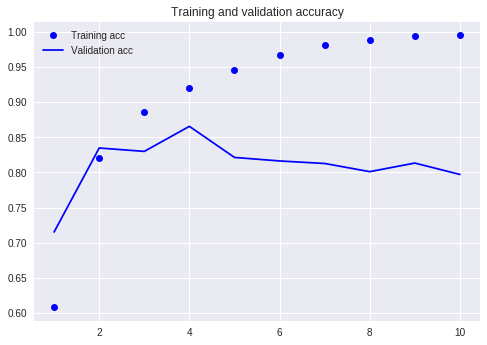

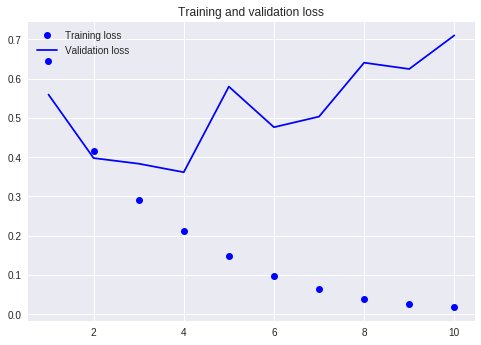

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Findings:
* There are problems with RNN's:
* The first one is that for this problem I only considered the first 500 words, rather than full sequences.
* SimpleRNN isn't good at processing long sequences, such as text